<a href="https://colab.research.google.com/github/MoneyMJ/Finance/blob/main/Weekly_Ret_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: Portfolio Optimization of a user with the help of efficient frontier 

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
# Getting the tickers
#FAANG- acebook, Apple, Amazon, Netflix, Google
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [ ]:
#Assigning weights to the stocks
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
#Accesing the starting date of stock


In [ ]:
#Last date


In [ ]:
#Dataframe df for storing the closing values of the stock
import time
import datetime

df=pd.DataFrame()

for ticker in assets:
  period1 = int(time.mktime(datetime.datetime(2013, 1, 1, 00, 00).timetuple()))
  period2 = int(time.mktime(datetime.datetime(2021, 8, 7, 00, 00).timetuple()))
  interval = '1wk' # 1d, 1m

  query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

  df1 = pd.read_csv(query_string)
  df['Date']=df1['Date']
  df[ticker]=df1['Adj Close']
  
df=df[['Date','FB','AMZN','AAPL','NFLX','GOOG']]
df=df.set_index('Date')
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-01,29.420000,268.459991,16.232281,14.171429,366.003143
2013-01-08,30.950001,272.730011,15.545991,14.778571,360.274597
2013-01-15,29.660000,272.119995,15.491772,14.167143,350.939606
2013-01-22,32.470001,276.040009,13.937328,23.158571,373.963287
2013-01-29,28.110001,259.980011,13.704640,24.962856,378.092804
...,...,...,...,...,...
2021-06-15,332.290009,3453.959961,132.300003,497.000000,2529.100098
2021-06-22,355.640015,3443.889893,134.779999,533.030029,2536.389893
2021-06-29,354.700012,3510.979980,139.960007,533.979980,2574.379883


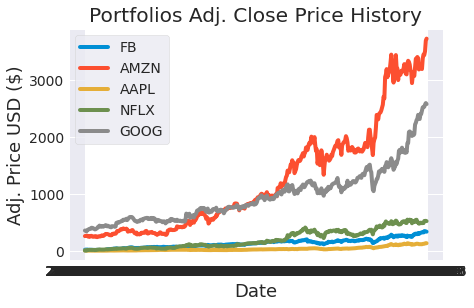

In [ ]:
#Visulaizing the stock portfolio
title='Portfolios Adj. Close Price History'

#Get the stocks
my_stocks=df

#Create & Plot the graph
sns.set_style('darkgrid')
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)

plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()


In [ ]:
#Weekly Simply Returns
returns= df.pct_change()
returns 

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-08,0.052005,0.015906,-0.042279,0.042843,-0.015652
2013-01-15,-0.041680,-0.002237,-0.003488,-0.041373,-0.025911
2013-01-22,0.094740,0.014405,-0.100340,0.634668,0.065606
2013-01-29,-0.134278,-0.058180,-0.016695,0.077910,0.011043
...,...,...,...,...,...
2021-06-15,-0.013303,0.020713,0.013949,-0.005781,0.000815
2021-06-22,0.070270,-0.002916,0.018745,0.072495,0.002882
2021-06-29,-0.002643,0.019481,0.038433,0.001782,0.014978


In [ ]:
#Create & show annualized covariance matrix
cov_matrix_annual=returns.cov()*252/7
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.080645,0.031300,0.026814,0.040984,0.031338
AMZN,0.031300,0.063210,0.024319,0.045997,0.029874
AAPL,0.026814,0.024319,0.056403,0.022245,0.023541
NFLX,0.040984,0.045997,0.022245,0.163169,0.039290
GOOG,0.031338,0.029874,0.023541,0.039290,0.042121


In [ ]:
#portflio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.04147812593901029

In [ ]:
#Portfolio Volatality aka Std
port_volatality=np.sqrt(port_variance)
port_volatality

0.20366179302709256

In [ ]:
#Annual Portfolio return
ann_ret=np.sum(returns.mean()*weights)*252/7
ann_ret

0.24758847090333372

In [ ]:
#Showing the expected annual return, volatality(risk), variance

percent_var=str(round(port_variance,2)*100)+' %'
percent_vol=str(round(port_volatality,2)*100)+' %'
percent_ret=str(round(ann_ret,2)*100)+' %'
print('Annual return '+percent_ret)
print('Annual volatality/risk '+percent_vol)
print('Annual Variance '+percent_var)


Annual return 25.0 %
Annual volatality/risk 20.0 %
Annual Variance 4.0 %


In [ ]:
pip install PyPortfolioOpt


     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 1.3MB 10.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736107 sha256=ae10f210f80f31370e7ecd60dbd7476a7c0cbee25e7bb90269e26043bb0708c9
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
#Portfolio Optimization

# calculating the expected returns and the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)/7
S=risk_models.sample_cov(df)/7

# Maximising the sharpe ratio
ef=EfficientFrontier(mu,S)
weights= ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.09305), ('AMZN', 0.26536), ('AAPL', 0.22268), ('NFLX', 0.41892), ('GOOG', 0.0)])
Expected annual return: 65.4%
Annual volatility: 24.4%
Sharpe Ratio: 2.59


(0.65390536673868, 0.24430210932007954, 2.594760104621735)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ',allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'FB': 4, 'AMZN': 1, 'AAPL': 24, 'NFLX': 12}
Funds Remaining: $79.11
